In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim  # You'll need this for the optimizer
import math

from sklearn.model_selection import train_test_split

In [2]:
# --- 1. Define Our Labels ---
LABEL_MAP = {
    "Negative": 0,
    "Positive": 1
}

# --- 2. Create the Dataset ---
# We MUST add the [CLS] token to the beginning of every sentence.
# This is the special token our Transformer will use to "summarize"
# the whole sentence.
data = [
    # Positive Examples
    ("[CLS] I loved every second of it", LABEL_MAP["Positive"]),
    ("[CLS] a truly amazing film", LABEL_MAP["Positive"]),
    ("[CLS] this movie was fantastic", LABEL_MAP["Positive"]),
    ("[CLS] the acting was superb", LABEL_MAP["Positive"]),
    ("[CLS] 10 out of 10 would recommend", LABEL_MAP["Positive"]),
    ("[CLS] a masterpiece of cinema", LABEL_MAP["Positive"]),
    ("[CLS] I was on the edge of my seat", LABEL_MAP["Positive"]),
    ("[CLS] a beautiful and touching story", LABEL_MAP["Positive"]),
    ("[CLS] an absolutely breathtaking masterpiece", LABEL_MAP["Positive"]),
    ("[CLS] the acting was top notch and emotionally gripping", LABEL_MAP["Positive"]),
    ("[CLS] beautifully directed with stunning visuals", LABEL_MAP["Positive"]),
    ("[CLS] this movie touched my heart in every way", LABEL_MAP["Positive"]),
    ("[CLS] a remarkable story told with passion and depth", LABEL_MAP["Positive"]),
    ("[CLS] easily one of the best films of the year", LABEL_MAP["Positive"]),
    ("[CLS] the chemistry between the leads was magical", LABEL_MAP["Positive"]),
    ("[CLS] a delightful blend of humor and emotion", LABEL_MAP["Positive"]),
    ("[CLS] i couldn’t stop smiling throughout the film", LABEL_MAP["Positive"]),
    ("[CLS] a perfect balance of story and character development", LABEL_MAP["Positive"]),
    ("[CLS] the soundtrack elevated every single scene", LABEL_MAP["Positive"]),
    ("[CLS] a visual and emotional triumph", LABEL_MAP["Positive"]),
    ("[CLS] this film exceeded all my expectations", LABEL_MAP["Positive"]),
    ("[CLS] deeply moving with an unforgettable ending", LABEL_MAP["Positive"]),
    ("[CLS] powerful performances that felt completely real", LABEL_MAP["Positive"]),
    ("[CLS] i loved every minute of it", LABEL_MAP["Positive"]),
    ("[CLS] pure cinematic brilliance", LABEL_MAP["Positive"]),
    ("[CLS] a heartwarming story that will stay with me", LABEL_MAP["Positive"]),
    ("[CLS] the pacing was perfect and engaging", LABEL_MAP["Positive"]),
    ("[CLS] such a creative and refreshing take on the genre", LABEL_MAP["Positive"]),
    ("[CLS] the visuals were mesmerizing and full of detail", LABEL_MAP["Positive"]),
    ("[CLS] the director did an outstanding job", LABEL_MAP["Positive"]),
    ("[CLS] the film’s message was inspiring and genuine", LABEL_MAP["Positive"]),
    ("[CLS] i felt emotionally connected to every character", LABEL_MAP["Positive"]),
    ("[CLS] truly one of the most enjoyable experiences i’ve had", LABEL_MAP["Positive"]),
    ("[CLS] incredible cinematography with breathtaking landscapes", LABEL_MAP["Positive"]),
    ("[CLS] heartfelt and beautifully executed", LABEL_MAP["Positive"]),
    ("[CLS] every scene was crafted with care and precision", LABEL_MAP["Positive"]),
    ("[CLS] it’s rare to see such a meaningful film these days", LABEL_MAP["Positive"]),
    ("[CLS] wonderfully acted and intelligently written", LABEL_MAP["Positive"]),
    ("[CLS] the humor landed perfectly every time", LABEL_MAP["Positive"]),
    ("[CLS] an uplifting and unforgettable experience", LABEL_MAP["Positive"]),
    ("[CLS] this film restored my faith in modern cinema", LABEL_MAP["Positive"]),
    ("[CLS] a must watch for any movie lover", LABEL_MAP["Positive"]),
    ("[CLS] deeply emotional with excellent pacing", LABEL_MAP["Positive"]),
    ("[CLS] the dialogue felt natural and real", LABEL_MAP["Positive"]),
    ("[CLS] i was completely immersed from start to finish", LABEL_MAP["Positive"]),
    ("[CLS] the film beautifully captures human emotions", LABEL_MAP["Positive"]),
    ("[CLS] top tier storytelling at its finest", LABEL_MAP["Positive"]),
    ("[CLS] the ending left me smiling and inspired", LABEL_MAP["Positive"]),
    ("[CLS] everything from the acting to the score was perfect", LABEL_MAP["Positive"]),
    ("[CLS] this film deserves all the praise it gets", LABEL_MAP["Positive"]),
    ("[CLS] the director’s vision truly shines through", LABEL_MAP["Positive"]),
    ("[CLS] absolutely loved the way the story unfolded", LABEL_MAP["Positive"]),
    ("[CLS] it’s the kind of film you’ll want to rewatch", LABEL_MAP["Positive"]),
    ("[CLS] moving performances that felt authentic", LABEL_MAP["Positive"]),
    ("[CLS] the movie was both entertaining and thought provoking", LABEL_MAP["Positive"]),
    ("[CLS] the production design was absolutely stunning", LABEL_MAP["Positive"]),
    ("[CLS] a compelling and beautifully written script", LABEL_MAP["Positive"]),
    ("[CLS] this film left a lasting impression on me", LABEL_MAP["Positive"]),
    ("[CLS] a fantastic experience that exceeded my hopes", LABEL_MAP["Positive"]),
    ("[CLS] a wonderfully crafted film with heartfelt moments", LABEL_MAP["Positive"]),
    ("[CLS] brilliantly written with a captivating storyline", LABEL_MAP["Positive"]),
    ("[CLS] the performances were powerful and deeply moving", LABEL_MAP["Positive"]),
    ("[CLS] absolutely loved the atmosphere and tone", LABEL_MAP["Positive"]),
    ("[CLS] an inspiring film that left me speechless", LABEL_MAP["Positive"]),
    ("[CLS] the characters felt authentic and relatable", LABEL_MAP["Positive"]),
    ("[CLS] this movie delivered far more than i expected", LABEL_MAP["Positive"]),
    ("[CLS] a thrilling and emotional ride from start to finish", LABEL_MAP["Positive"]),
    ("[CLS] the humor was clever and genuinely funny", LABEL_MAP["Positive"]),
    ("[CLS] a beautifully told story that resonated with me", LABEL_MAP["Positive"]),
    ("[CLS] everything worked together perfectly", LABEL_MAP["Positive"]),
    ("[CLS] a rich story with deep emotional layers", LABEL_MAP["Positive"]),
    ("[CLS] the cinematography was absolutely breathtaking", LABEL_MAP["Positive"]),
    ("[CLS] a top tier experience with fantastic direction", LABEL_MAP["Positive"]),
    ("[CLS] the pacing kept me fully invested throughout", LABEL_MAP["Positive"]),
    ("[CLS] a warm and emotionally fulfilling film", LABEL_MAP["Positive"]),
    ("[CLS] great characters supported by excellent writing", LABEL_MAP["Positive"]),
    ("[CLS] the world building was fantastic and immersive", LABEL_MAP["Positive"]),
    ("[CLS] the plot twists were clever and satisfying", LABEL_MAP["Positive"]),
    ("[CLS] truly a standout film in its genre", LABEL_MAP["Positive"]),
    ("[CLS] highly entertaining with memorable moments", LABEL_MAP["Positive"]),
    ("[CLS] the music perfectly matched the emotional tone", LABEL_MAP["Positive"]),
    ("[CLS] a charming movie that exceeded expectations", LABEL_MAP["Positive"]),
    ("[CLS] i enjoyed the chemistry of the entire cast", LABEL_MAP["Positive"]),
    ("[CLS] the visuals were gorgeous and imaginative", LABEL_MAP["Positive"]),
    ("[CLS] every scene felt purposeful and meaningful", LABEL_MAP["Positive"]),
    ("[CLS] the ending was satisfying and beautifully done", LABEL_MAP["Positive"]),
    ("[CLS] the film carries a message that truly resonates", LABEL_MAP["Positive"]),
    ("[CLS] the emotional beats were handled masterfully", LABEL_MAP["Positive"]),
    ("[CLS] an unforgettable and moving cinematic experience", LABEL_MAP["Positive"]),
    ("[CLS] the story was exciting and full of surprises", LABEL_MAP["Positive"]),
    ("[CLS] well acted with a genuinely heartfelt script", LABEL_MAP["Positive"]),
    ("[CLS] the film had a charm that stayed with me", LABEL_MAP["Positive"]),
    ("[CLS] emotional, powerful, and beautifully shot", LABEL_MAP["Positive"]),
    ("[CLS] the attention to detail was absolutely stunning", LABEL_MAP["Positive"]),
    ("[CLS] this is the kind of movie that inspires you", LABEL_MAP["Positive"]),
    ("[CLS] superb dialogue and excellent character arcs", LABEL_MAP["Positive"]),
    ("[CLS] the film is full of heart and authenticity", LABEL_MAP["Positive"]),
    ("[CLS] a joyous experience that left me smiling", LABEL_MAP["Positive"]),
    ("[CLS] fantastic pacing and a wonderfully crafted plot", LABEL_MAP["Positive"]),
    ("[CLS] the emotional depth of the story surprised me", LABEL_MAP["Positive"]),
    ("[CLS] the direction was thoughtful and precise", LABEL_MAP["Positive"]),
    ("[CLS] it was both entertaining and beautifully meaningful", LABEL_MAP["Positive"]),
    ("[CLS] a thrilling story with great emotional weight", LABEL_MAP["Positive"]),
    ("[CLS] one of the most well crafted films i’ve seen lately", LABEL_MAP["Positive"]),
    ("[CLS] everything from the visuals to the score was fantastic", LABEL_MAP["Positive"]),
    ("[CLS] a truly enjoyable story with memorable performances", LABEL_MAP["Positive"]),
    ("[CLS] heartfelt dialogue that brought the characters to life", LABEL_MAP["Positive"]),
    ("[CLS] i found the film inspiring and incredibly well told", LABEL_MAP["Positive"]),
    ("[CLS] a spectacularly executed film with real emotional impact", LABEL_MAP["Positive"]),
    # another set of positive examples
    ("[CLS] a truly captivating journey from start to finish", LABEL_MAP["Positive"]),
    ("[CLS] i was impressed by how the story unfolded naturally", LABEL_MAP["Positive"]),
    ("[CLS] the emotional build up was subtle yet powerful", LABEL_MAP["Positive"]),
    ("[CLS] the actors delivered performances full of authenticity", LABEL_MAP["Positive"]),
    ("[CLS] visually breathtaking with impeccable camera work", LABEL_MAP["Positive"]),
    ("[CLS] the director crafted an atmosphere that drew me in", LABEL_MAP["Positive"]),
    ("[CLS] every scene felt purposeful and beautifully arranged", LABEL_MAP["Positive"]),
    ("[CLS] a deeply human story told with elegance", LABEL_MAP["Positive"]),
    ("[CLS] the writing was sharp witty and full of life", LABEL_MAP["Positive"]),
    ("[CLS] i left the theater smiling from ear to ear", LABEL_MAP["Positive"]),
    ("[CLS] such a moving portrayal of love and loss", LABEL_MAP["Positive"]),
    ("[CLS] the entire cast gave their absolute best", LABEL_MAP["Positive"]),
    ("[CLS] perfectly paced with just the right emotional beats", LABEL_MAP["Positive"]),
    ("[CLS] a cinematic gem that deserves more recognition", LABEL_MAP["Positive"]),
    ("[CLS] heartwarming story that felt honest and raw", LABEL_MAP["Positive"]),
    ("[CLS] a clever and imaginative film experience", LABEL_MAP["Positive"]),
    ("[CLS] beautifully performed and delicately directed", LABEL_MAP["Positive"]),
    ("[CLS] it had me laughing crying and cheering", LABEL_MAP["Positive"]),
    ("[CLS] every aspect of the movie worked seamlessly together", LABEL_MAP["Positive"]),
    ("[CLS] a triumph of storytelling and emotional resonance", LABEL_MAP["Positive"]),
    ("[CLS] the production design was rich and immersive", LABEL_MAP["Positive"]),
    ("[CLS] the dialogue sparkled with humor and intelligence", LABEL_MAP["Positive"]),
    ("[CLS] a rare film that gets better the more you think about it", LABEL_MAP["Positive"]),
    ("[CLS] one of those movies that stay with you long after", LABEL_MAP["Positive"]),
    ("[CLS] beautifully written with heart and honesty", LABEL_MAP["Positive"]),
    ("[CLS] i was amazed by the emotional range of the main actor", LABEL_MAP["Positive"]),
    ("[CLS] stunningly edited and masterfully performed", LABEL_MAP["Positive"]),
    ("[CLS] every detail contributed to the film’s depth", LABEL_MAP["Positive"]),
    ("[CLS] the story’s simplicity made it even more powerful", LABEL_MAP["Positive"]),
    ("[CLS] one of the most emotionally satisfying films i’ve seen", LABEL_MAP["Positive"]),
    ("[CLS] i found myself completely absorbed in the narrative", LABEL_MAP["Positive"]),
    ("[CLS] a fantastic exploration of human connection", LABEL_MAP["Positive"]),
    ("[CLS] the tone and pacing were pitch perfect", LABEL_MAP["Positive"]),
    ("[CLS] beautifully atmospheric and emotionally fulfilling", LABEL_MAP["Positive"]),
    ("[CLS] it’s rare to see such attention to emotional nuance", LABEL_MAP["Positive"]),
    ("[CLS] a masterclass in direction and subtle storytelling", LABEL_MAP["Positive"]),
    ("[CLS] the humor felt organic and never overdone", LABEL_MAP["Positive"]),
    ("[CLS] i walked away feeling inspired and grateful", LABEL_MAP["Positive"]),
    ("[CLS] the script’s simplicity made the emotions more real", LABEL_MAP["Positive"]),
    ("[CLS] brilliant pacing that kept me invested throughout", LABEL_MAP["Positive"]),
    ("[CLS] a refreshingly sincere and heart driven story", LABEL_MAP["Positive"]),
    ("[CLS] every frame felt carefully thought out and meaningful", LABEL_MAP["Positive"]),
    ("[CLS] the film’s warmth and sincerity were undeniable", LABEL_MAP["Positive"]),
    ("[CLS] genuine chemistry between the leads elevated the film", LABEL_MAP["Positive"]),
    ("[CLS] i could watch this movie again and still be amazed", LABEL_MAP["Positive"]),
    ("[CLS] emotionally intelligent storytelling done right", LABEL_MAP["Positive"]),
    ("[CLS] this film reminded me why i love cinema", LABEL_MAP["Positive"]),
    ("[CLS] heartfelt performances made the story come alive", LABEL_MAP["Positive"]),
    ("[CLS] it’s a film that makes you feel something real", LABEL_MAP["Positive"]),
    ("[CLS] a refreshing change from the usual formulaic movies", LABEL_MAP["Positive"]),
    ("[CLS] an emotionally stunning film that exceeded expectations", LABEL_MAP["Positive"]),
    ("[CLS] heartfelt storytelling combined with breathtaking visuals", LABEL_MAP["Positive"]),
    ("[CLS] a remarkable performance that carried the entire film", LABEL_MAP["Positive"]),
    ("[CLS] genuinely entertaining and full of surprises", LABEL_MAP["Positive"]),
    ("[CLS] the story unfolded beautifully with rich character arcs", LABEL_MAP["Positive"]),
    ("[CLS] a perfect mix of laughter tears and wonder", LABEL_MAP["Positive"]),
    ("[CLS] thoughtful direction made every moment meaningful", LABEL_MAP["Positive"]),
    ("[CLS] an inspiring and beautifully crafted piece of cinema", LABEL_MAP["Positive"]),
    ("[CLS] the lead actor delivered a career defining performance", LABEL_MAP["Positive"]),
    ("[CLS] i left the theater deeply moved and satisfied", LABEL_MAP["Positive"]),
    ("[CLS] the humor was light charming and perfectly timed", LABEL_MAP["Positive"]),
    ("[CLS] stunning visual effects enhanced the emotional impact", LABEL_MAP["Positive"]),
    ("[CLS] the movie was filled with creativity and heart", LABEL_MAP["Positive"]),
    ("[CLS] truly one of the most inspiring films i’ve ever seen", LABEL_MAP["Positive"]),
    ("[CLS] powerful emotions conveyed through subtle storytelling", LABEL_MAP["Positive"]),
    ("[CLS] each scene was crafted with purpose and precision", LABEL_MAP["Positive"]),
    ("[CLS] the narrative was engaging and full of energy", LABEL_MAP["Positive"]),
    ("[CLS] a heartfelt exploration of life love and family", LABEL_MAP["Positive"]),
    ("[CLS] every aspect of this film radiates passion", LABEL_MAP["Positive"]),
    ("[CLS] the emotional depth made this movie unforgettable", LABEL_MAP["Positive"]),
    ("[CLS] an elegant balance of humor and heartfelt drama", LABEL_MAP["Positive"]),
    ("[CLS] the supporting cast added so much authenticity", LABEL_MAP["Positive"]),
    ("[CLS] i found myself completely immersed in the experience", LABEL_MAP["Positive"]),
    ("[CLS] this is storytelling at its most sincere and effective", LABEL_MAP["Positive"]),
    ("[CLS] visually captivating and narratively satisfying", LABEL_MAP["Positive"]),
    ("[CLS] i appreciated the subtle humor and nuanced tone", LABEL_MAP["Positive"]),
    ("[CLS] a charming and uplifting film that warmed my heart", LABEL_MAP["Positive"]),
    ("[CLS] every emotion felt raw and beautifully portrayed", LABEL_MAP["Positive"]),
    ("[CLS] the pacing was tight and perfectly executed", LABEL_MAP["Positive"]),
    ("[CLS] an inspiring tale of perseverance and courage", LABEL_MAP["Positive"]),
    ("[CLS] beautifully acted and intelligently directed", LABEL_MAP["Positive"]),
    ("[CLS] i was fully engaged from the opening to the credits", LABEL_MAP["Positive"]),
    ("[CLS] the chemistry between the leads was absolutely electric", LABEL_MAP["Positive"]),
    ("[CLS] the attention to small details was impressive", LABEL_MAP["Positive"]),
    ("[CLS] a rare gem with incredible emotional power", LABEL_MAP["Positive"]),
    ("[CLS] every performance felt honest and deeply human", LABEL_MAP["Positive"]),
    ("[CLS] a wonderful journey that felt both epic and intimate", LABEL_MAP["Positive"]),
    ("[CLS] the dialogues were meaningful and beautifully delivered", LABEL_MAP["Positive"]),
    ("[CLS] the atmosphere and tone were handled masterfully", LABEL_MAP["Positive"]),
    ("[CLS] deeply emotional yet surprisingly uplifting", LABEL_MAP["Positive"]),
    ("[CLS] this film reignited my love for classic cinema", LABEL_MAP["Positive"]),
    ("[CLS] memorable characters brought the story to life", LABEL_MAP["Positive"]),
    ("[CLS] every shot was framed with artistic brilliance", LABEL_MAP["Positive"]),
    ("[CLS] the film offered a perfect blend of style and substance", LABEL_MAP["Positive"]),
    ("[CLS] pure cinematic joy from beginning to end", LABEL_MAP["Positive"]),
    ("[CLS] the director managed to capture magic on screen", LABEL_MAP["Positive"]),
    ("[CLS] a story that will inspire generations to come", LABEL_MAP["Positive"]),
    ("[CLS] beautifully layered themes and powerful symbolism", LABEL_MAP["Positive"]),
    ("[CLS] an incredibly well executed and emotionally rich movie", LABEL_MAP["Positive"]),
    ("[CLS] it’s rare to find a film with such sincerity and charm", LABEL_MAP["Positive"]),
    ("[CLS] one of the most fulfilling movie experiences i’ve had", LABEL_MAP["Positive"]),



    # Negative Examples
    ("[CLS] this movie was a waste of time", LABEL_MAP["Negative"]),
    ("[CLS] the plot was boring and slow", LABEL_MAP["Negative"]),
    ("[CLS] I hated this film", LABEL_MAP["Negative"]),
    ("[CLS] the acting was terrible", LABEL_MAP["Negative"]),
    ("[CLS] I would not recommend this movie", LABEL_MAP["Negative"]),
    ("[CLS] a complete disaster from start to finish", LABEL_MAP["Negative"]),
    ("[CLS] I fell asleep halfway through", LABEL_MAP["Negative"]),
    ("[CLS] the characters were so annoying", LABEL_MAP["Negative"]),
    ("[CLS] the plot was painfully slow and predictable", LABEL_MAP["Negative"]),
    ("[CLS] terrible acting ruined what could have been decent", LABEL_MAP["Negative"]),
    ("[CLS] a complete waste of time and money", LABEL_MAP["Negative"]),
    ("[CLS] poorly written with no real direction", LABEL_MAP["Negative"]),
    ("[CLS] the characters were flat and uninteresting", LABEL_MAP["Negative"]),
    ("[CLS] i couldn’t wait for this movie to end", LABEL_MAP["Negative"]),
    ("[CLS] the humor felt forced and awkward", LABEL_MAP["Negative"]),
    ("[CLS] dull from beginning to end", LABEL_MAP["Negative"]),
    ("[CLS] nothing about this film worked for me", LABEL_MAP["Negative"]),
    ("[CLS] disappointing in every possible way", LABEL_MAP["Negative"]),
    ("[CLS] the story made no sense at all", LABEL_MAP["Negative"]),
    ("[CLS] overhyped and completely underwhelming", LABEL_MAP["Negative"]),
    ("[CLS] weak performances across the board", LABEL_MAP["Negative"]),
    ("[CLS] the dialogue was cringeworthy and unnatural", LABEL_MAP["Negative"]),
    ("[CLS] an incoherent mess of random scenes", LABEL_MAP["Negative"]),
    ("[CLS] the direction was sloppy and uninspired", LABEL_MAP["Negative"]),
    ("[CLS] a predictable and forgettable experience", LABEL_MAP["Negative"]),
    ("[CLS] i felt nothing for any of the characters", LABEL_MAP["Negative"]),
    ("[CLS] the pacing was painfully uneven", LABEL_MAP["Negative"]),
    ("[CLS] it tried too hard to be emotional but failed", LABEL_MAP["Negative"]),
    ("[CLS] this movie dragged on with no purpose", LABEL_MAP["Negative"]),
    ("[CLS] unconvincing acting and poor editing", LABEL_MAP["Negative"]),
    ("[CLS] a frustrating experience from start to finish", LABEL_MAP["Negative"]),
    ("[CLS] the plot twists were ridiculous and lazy", LABEL_MAP["Negative"]),
    ("[CLS] i regret spending time watching this", LABEL_MAP["Negative"]),
    ("[CLS] visually bland and emotionally empty", LABEL_MAP["Negative"]),
    ("[CLS] a cheap imitation of better films", LABEL_MAP["Negative"]),
    ("[CLS] so boring that i almost fell asleep", LABEL_MAP["Negative"]),
    ("[CLS] the jokes didn’t land and the drama didn’t work", LABEL_MAP["Negative"]),
    ("[CLS] the cinematography looked amateurish", LABEL_MAP["Negative"]),
    ("[CLS] nothing memorable about this movie", LABEL_MAP["Negative"]),
    ("[CLS] it felt like a first draft that was never edited", LABEL_MAP["Negative"]),
    ("[CLS] too long and painfully dull", LABEL_MAP["Negative"]),
    ("[CLS] this film completely lacked creativity", LABEL_MAP["Negative"]),
    ("[CLS] an absolute disaster of a movie", LABEL_MAP["Negative"]),
    ("[CLS] it was emotionally hollow and visually flat", LABEL_MAP["Negative"]),
    ("[CLS] everything about this film felt fake", LABEL_MAP["Negative"]),
    ("[CLS] disappointing performances and clunky dialogue", LABEL_MAP["Negative"]),
    ("[CLS] it failed to capture my attention at any point", LABEL_MAP["Negative"]),
    ("[CLS] the story was confusing and poorly told", LABEL_MAP["Negative"]),
    ("[CLS] an exhausting and joyless viewing experience", LABEL_MAP["Negative"]),
    ("[CLS] the ending was abrupt and unsatisfying", LABEL_MAP["Negative"]),
    ("[CLS] poor character development ruined the film", LABEL_MAP["Negative"]),
    ("[CLS] even the music couldn’t save this mess", LABEL_MAP["Negative"]),
    ("[CLS] shallow storytelling and weak direction", LABEL_MAP["Negative"]),
    ("[CLS] the special effects were laughably bad", LABEL_MAP["Negative"]),
    ("[CLS] absolutely no emotional payoff", LABEL_MAP["Negative"]),
    ("[CLS] this movie lacked both heart and originality", LABEL_MAP["Negative"]),
    ("[CLS] a lifeless film that tried to be deep", LABEL_MAP["Negative"]),
    ("[CLS] one of the worst movies i’ve seen all year", LABEL_MAP["Negative"]),
    ("[CLS] everything about it screamed low effort", LABEL_MAP["Negative"]),
    ("[CLS] a painfully dull film with nothing interesting to offer", LABEL_MAP["Negative"]),
    ("[CLS] the acting felt stiff and emotionless throughout", LABEL_MAP["Negative"]),
    ("[CLS] completely lacked direction and purpose", LABEL_MAP["Negative"]),
    ("[CLS] poorly written with shallow characters", LABEL_MAP["Negative"]),
    ("[CLS] the movie failed to deliver any emotional depth", LABEL_MAP["Negative"]),
    ("[CLS] a frustratingly slow and unoriginal story", LABEL_MAP["Negative"]),
    ("[CLS] everything about this film felt forced", LABEL_MAP["Negative"]),
    ("[CLS] i couldn’t connect with the characters at all", LABEL_MAP["Negative"]),
    ("[CLS] the comedy fell flat and felt awkward", LABEL_MAP["Negative"]),
    ("[CLS] visually bland with no standout moments", LABEL_MAP["Negative"]),
    ("[CLS] this movie was incredibly disappointing", LABEL_MAP["Negative"]),
    ("[CLS] the pacing was so slow it became unbearable", LABEL_MAP["Negative"]),
    ("[CLS] all the emotional moments felt unearned and empty", LABEL_MAP["Negative"]),
    ("[CLS] the plot was predictable and lacked creativity", LABEL_MAP["Negative"]),
    ("[CLS] awkward dialogue ruined most scenes", LABEL_MAP["Negative"]),
    ("[CLS] the film tried to be dramatic but came off cheesy", LABEL_MAP["Negative"]),
    ("[CLS] i felt bored for nearly the entire runtime", LABEL_MAP["Negative"]),
    ("[CLS] the editing was sloppy and distracting", LABEL_MAP["Negative"]),
    ("[CLS] nothing about the story felt believable", LABEL_MAP["Negative"]),
    ("[CLS] the movie left me feeling annoyed and unsatisfied", LABEL_MAP["Negative"]),
    ("[CLS] the cinematography was plain and uninspired", LABEL_MAP["Negative"]),
    ("[CLS] all the characters were one dimensional", LABEL_MAP["Negative"]),
    ("[CLS] none of the jokes were funny in the slightest", LABEL_MAP["Negative"]),
    ("[CLS] the film dragged on far too long", LABEL_MAP["Negative"]),
    ("[CLS] everything felt cheaply produced and rushed", LABEL_MAP["Negative"]),
    ("[CLS] the performances felt forced and unnatural", LABEL_MAP["Negative"]),
    ("[CLS] it completely lacked emotional impact", LABEL_MAP["Negative"]),
    ("[CLS] the story had no clear direction at all", LABEL_MAP["Negative"]),
    ("[CLS] the music was distracting and poorly placed", LABEL_MAP["Negative"]),
    ("[CLS] nothing in the film made any sense", LABEL_MAP["Negative"]),
    ("[CLS] the plot twists were predictable and boring", LABEL_MAP["Negative"]),
    ("[CLS] i regret watching this movie", LABEL_MAP["Negative"]),
    ("[CLS] weak storytelling and clumsy execution", LABEL_MAP["Negative"]),
    ("[CLS] the film was full of clichés and tired tropes", LABEL_MAP["Negative"]),
    ("[CLS] none of the emotional moments landed for me", LABEL_MAP["Negative"]),
    ("[CLS] the script was messy and lacked coherence", LABEL_MAP["Negative"]),
    ("[CLS] it felt more like a rough draft than a finished film", LABEL_MAP["Negative"]),
    ("[CLS] the acting was unconvincing and flat", LABEL_MAP["Negative"]),
    ("[CLS] an exhausting movie with little payoff", LABEL_MAP["Negative"]),
    ("[CLS] the ending felt rushed and poorly written", LABEL_MAP["Negative"]),
    ("[CLS] i did not enjoy a single moment of this film", LABEL_MAP["Negative"]),
    ("[CLS] the visuals were cheap and uninspired", LABEL_MAP["Negative"]),
    ("[CLS] the story lacked any real stakes", LABEL_MAP["Negative"]),
    ("[CLS] the characters had no development whatsoever", LABEL_MAP["Negative"]),
    ("[CLS] the dialogue was awkward and unrealistic", LABEL_MAP["Negative"]),
    ("[CLS] the entire film felt like a missed opportunity", LABEL_MAP["Negative"]),
    ("[CLS] incredibly drawn out with no meaningful payoff", LABEL_MAP["Negative"]),
    ("[CLS] the action scenes were poorly choreographed", LABEL_MAP["Negative"]),
    ("[CLS] i found the entire movie painfully mediocre", LABEL_MAP["Negative"]),
    ("[CLS] every scene felt repetitive and uninspired", LABEL_MAP["Negative"]),
    ("[CLS] one of the most forgettable movies i’ve seen", LABEL_MAP["Negative"]),
    # another set of negative examples
    ("[CLS] the movie failed to deliver anything remotely engaging", LABEL_MAP["Negative"]),
    ("[CLS] an overlong film that never finds its purpose", LABEL_MAP["Negative"]),
    ("[CLS] the characters lacked motivation and depth", LABEL_MAP["Negative"]),
    ("[CLS] i was disappointed by how lifeless the story felt", LABEL_MAP["Negative"]),
    ("[CLS] the film’s tone was inconsistent and confusing", LABEL_MAP["Negative"]),
    ("[CLS] awkward performances made the movie hard to take seriously", LABEL_MAP["Negative"]),
    ("[CLS] a forgettable experience that left no impression", LABEL_MAP["Negative"]),
    ("[CLS] the story was stretched far beyond its limits", LABEL_MAP["Negative"]),
    ("[CLS] dull direction and an uninspired script killed it", LABEL_MAP["Negative"]),
    ("[CLS] i didn’t care about any of the characters", LABEL_MAP["Negative"]),
    ("[CLS] unnecessary subplots made the film exhausting to follow", LABEL_MAP["Negative"]),
    ("[CLS] every emotional moment felt fake and manipulative", LABEL_MAP["Negative"]),
    ("[CLS] a visually bland movie with zero emotional depth", LABEL_MAP["Negative"]),
    ("[CLS] weak storytelling that never justified its runtime", LABEL_MAP["Negative"]),
    ("[CLS] predictable dialogue made it painfully boring", LABEL_MAP["Negative"]),
    ("[CLS] i expected more substance from such a talented cast", LABEL_MAP["Negative"]),
    ("[CLS] it was overproduced and underwritten", LABEL_MAP["Negative"]),
    ("[CLS] flat cinematography and dull lighting ruined the mood", LABEL_MAP["Negative"]),
    ("[CLS] an emotionless film that left me empty", LABEL_MAP["Negative"]),
    ("[CLS] poor editing made the transitions feel jarring", LABEL_MAP["Negative"]),
    ("[CLS] the pacing was inconsistent and tiresome", LABEL_MAP["Negative"]),
    ("[CLS] it tried to be artistic but ended up pretentious", LABEL_MAP["Negative"]),
    ("[CLS] clunky dialogue made even serious scenes laughable", LABEL_MAP["Negative"]),
    ("[CLS] the climax was underwhelming and abrupt", LABEL_MAP["Negative"]),
    ("[CLS] overuse of clichés ruined what could have been interesting", LABEL_MAP["Negative"]),
    ("[CLS] the emotional tone felt completely off balance", LABEL_MAP["Negative"]),
    ("[CLS] a messy film that doesn’t know what it wants to be", LABEL_MAP["Negative"]),
    ("[CLS] i was constantly checking how much time was left", LABEL_MAP["Negative"]),
    ("[CLS] a hollow attempt at drama with no emotional weight", LABEL_MAP["Negative"]),
    ("[CLS] this movie felt like it was made on autopilot", LABEL_MAP["Negative"]),
    ("[CLS] the soundtrack was distracting and poorly chosen", LABEL_MAP["Negative"]),
    ("[CLS] unconvincing performances ruined the serious moments", LABEL_MAP["Negative"]),
    ("[CLS] the film completely lacked direction and focus", LABEL_MAP["Negative"]),
    ("[CLS] i couldn’t relate to any of the poorly written characters", LABEL_MAP["Negative"]),
    ("[CLS] uninspired cinematography made it look like a tv commercial", LABEL_MAP["Negative"]),
    ("[CLS] even the action scenes were dull and repetitive", LABEL_MAP["Negative"]),
    ("[CLS] the story jumped around with no real flow", LABEL_MAP["Negative"]),
    ("[CLS] the emotional scenes felt unearned and forced", LABEL_MAP["Negative"]),
    ("[CLS] nothing about this movie felt believable or genuine", LABEL_MAP["Negative"]),
    ("[CLS] the film’s attempts at humor constantly fell flat", LABEL_MAP["Negative"]),
    ("[CLS] there was no sense of tension or excitement", LABEL_MAP["Negative"]),
    ("[CLS] a tedious story that fails to engage its audience", LABEL_MAP["Negative"]),
    ("[CLS] unoriginal and bland with no standout moments", LABEL_MAP["Negative"]),
    ("[CLS] poor lighting and uneven audio made it worse", LABEL_MAP["Negative"]),
    ("[CLS] disappointing from such a promising trailer", LABEL_MAP["Negative"]),
    ("[CLS] i couldn’t finish it because it was that boring", LABEL_MAP["Negative"]),
    ("[CLS] a painfully average film that offered nothing new", LABEL_MAP["Negative"]),
    ("[CLS] the characters were stereotypes with no personality", LABEL_MAP["Negative"]),
    ("[CLS] the movie ended abruptly leaving too many loose ends", LABEL_MAP["Negative"]),
    ("[CLS] the entire experience felt empty and unmemorable", LABEL_MAP["Negative"]),
    ("[CLS] the direction lacked any sense of creativity or passion", LABEL_MAP["Negative"]),
     ("[CLS] a dull film with no emotional connection or excitement", LABEL_MAP["Negative"]),
    ("[CLS] poor direction made even the good actors look bad", LABEL_MAP["Negative"]),
    ("[CLS] the story lacked focus and went nowhere", LABEL_MAP["Negative"]),
    ("[CLS] everything about the movie felt artificial and hollow", LABEL_MAP["Negative"]),
    ("[CLS] weak character development made it hard to care", LABEL_MAP["Negative"]),
    ("[CLS] the film’s message was unclear and poorly expressed", LABEL_MAP["Negative"]),
    ("[CLS] the pacing dragged endlessly with no real payoff", LABEL_MAP["Negative"]),
    ("[CLS] forgettable plot with cringe inducing dialogue", LABEL_MAP["Negative"]),
    ("[CLS] too many plot holes ruined the immersion", LABEL_MAP["Negative"]),
    ("[CLS] the performances were over the top and unconvincing", LABEL_MAP["Negative"]),
    ("[CLS] predictable from the first minute to the last", LABEL_MAP["Negative"]),
    ("[CLS] a lazy script that felt copied from better films", LABEL_MAP["Negative"]),
    ("[CLS] every attempt at humor completely missed the mark", LABEL_MAP["Negative"]),
    ("[CLS] visually unimpressive with sloppy editing", LABEL_MAP["Negative"]),
    ("[CLS] i struggled to stay awake through the entire movie", LABEL_MAP["Negative"]),
    ("[CLS] an overly long film with nothing meaningful to say", LABEL_MAP["Negative"]),
    ("[CLS] the emotional scenes felt fake and exaggerated", LABEL_MAP["Negative"]),
    ("[CLS] the soundtrack didn’t match the tone at all", LABEL_MAP["Negative"]),
    ("[CLS] a painfully awkward attempt at drama", LABEL_MAP["Negative"]),
    ("[CLS] none of the characters behaved believably", LABEL_MAP["Negative"]),
    ("[CLS] it lacked creativity and originality in every way", LABEL_MAP["Negative"]),
    ("[CLS] the editing was chaotic and hard to follow", LABEL_MAP["Negative"]),
    ("[CLS] the dialogue was so bad it made me cringe", LABEL_MAP["Negative"]),
    ("[CLS] this movie had no heart or soul whatsoever", LABEL_MAP["Negative"]),
    ("[CLS] the storyline was empty and full of clichés", LABEL_MAP["Negative"]),
    ("[CLS] even the action scenes felt flat and lifeless", LABEL_MAP["Negative"]),
    ("[CLS] the ending was rushed and unsatisfying", LABEL_MAP["Negative"]),
    ("[CLS] the camera work was amateurish and distracting", LABEL_MAP["Negative"]),
    ("[CLS] a confusing mess that failed to engage me", LABEL_MAP["Negative"]),
    ("[CLS] it was overdramatic without earning the emotion", LABEL_MAP["Negative"]),
    ("[CLS] a disappointing film that lacked any real tension", LABEL_MAP["Negative"]),
    ("[CLS] poor writing made the entire plot fall apart", LABEL_MAP["Negative"]),
    ("[CLS] everything felt overacted and underdeveloped", LABEL_MAP["Negative"]),
    ("[CLS] the tone shifted constantly without purpose", LABEL_MAP["Negative"]),
    ("[CLS] a painfully generic film with no personality", LABEL_MAP["Negative"]),
    ("[CLS] it failed to deliver on its own premise", LABEL_MAP["Negative"]),
    ("[CLS] the visuals were grainy and uninspired", LABEL_MAP["Negative"]),
    ("[CLS] i was bored and frustrated throughout", LABEL_MAP["Negative"]),
    ("[CLS] an unnecessary sequel that adds nothing new", LABEL_MAP["Negative"]),
    ("[CLS] the pacing was uneven and poorly controlled", LABEL_MAP["Negative"]),
    ("[CLS] a shallow film that thinks it’s smarter than it is", LABEL_MAP["Negative"]),
    ("[CLS] lifeless acting made the movie hard to enjoy", LABEL_MAP["Negative"]),
    ("[CLS] it felt like the entire production was rushed", LABEL_MAP["Negative"]),
    ("[CLS] the emotional tone never felt genuine or real", LABEL_MAP["Negative"]),
    ("[CLS] the jokes were stale and the timing was off", LABEL_MAP["Negative"]),
    ("[CLS] the entire film was visually dark and hard to watch", LABEL_MAP["Negative"]),
    ("[CLS] it dragged on far too long without a real conclusion", LABEL_MAP["Negative"]),
    ("[CLS] there was nothing memorable about this film", LABEL_MAP["Negative"]),
    ("[CLS] the movie lacked direction and purpose", LABEL_MAP["Negative"]),
    ("[CLS] unbalanced tone made it neither funny nor serious", LABEL_MAP["Negative"]),
    ("[CLS] one of the most forgettable films i’ve ever seen", LABEL_MAP["Negative"]),
    ("[CLS] it was frustratingly slow with no emotional payoff", LABEL_MAP["Negative"])


]

# --- 3. Separate Sentences and Labels for Splitting ---
# We need two separate lists to tell the function what to stratify by.
sentences = [item[0] for item in data] # A list of all your sentences
labels = [item[1] for item in data]   # A list of all your labels (0s and 1s)

# --- 4. Split the Dataset (with Stratification) ---
# We split both lists at the same time and add `stratify=labels`
train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    sentences,         # The features to split
    labels,            # The labels to split
    test_size=0.2,     # 20% for testing
    random_state=42,   # For reproducible results
    shuffle=True,      # Shuffle the data
    stratify=labels    # <--- THIS IS THE IMPORTANT PART
)

# `stratify=labels` tells the function:
# "Look at the list of 0s and 1s in 'labels'. When you create the
# train and test sets, make sure both sets have the *same percentage*
# of 0s and 1s as the original list."

# --- 5. Re-zip the lists into the (sentence, label) format ---
# This puts the data back in the format the rest of your code expects.
train_data = list(zip(train_sentences, train_labels))
test_data = list(zip(test_sentences, test_labels))

# --- 6. Print the results ---
print(f"Total dataset size: {len(data)} sentences")
print(f"Training data size: {len(train_data)} sentences")
print(f"Test data size: {len(test_data)} sentences")
print("-" * 30)

# You can add this to PROVE that the split was balanced:
original_percent = (sum(labels) / len(labels)) * 100
train_percent = (sum(train_labels) / len(train_labels)) * 100
test_percent = (sum(test_labels) / len(test_labels)) * 100

print(f"Original Positive %: {original_percent:.2f}%")
print(f"Training Positive %: {train_percent:.2f}%")
print(f"Test Positive %:     {test_percent:.2f}%")

Total dataset size: 423 sentences
Training data size: 338 sentences
Test data size: 85 sentences
------------------------------
Original Positive %: 49.65%
Training Positive %: 49.70%
Test Positive %:     49.41%


In [3]:
# 3. Build the Vocab
# It will now automatically find and add the "[CLS]" token.
all_words = set()
for sentence, label in train_data: # <--- CHANGED FROM 'data'
    # We must split based on spaces
    words_in_sentence = sentence.lower().split(' ')
    all_words.update(words_in_sentence)

# Add <PAD> token
vocab = {"<PAD>": 0}
index = 1
for word in sorted(list(all_words)):
    vocab[word] = index
    index += 1

print("\nYour new vocabulary (notice '[cls]' is in it):")
print(vocab)


Your new vocabulary (notice '[cls]' is in it):
{'<PAD>': 0, '10': 1, '[cls]': 2, 'a': 3, 'about': 4, 'abrupt': 5, 'abruptly': 6, 'absolute': 7, 'absolutely': 8, 'absorbed': 9, 'acted': 10, 'acting': 11, 'action': 12, 'actor': 13, 'actors': 14, 'added': 15, 'adds': 16, 'after': 17, 'again': 18, 'alive': 19, 'all': 20, 'almost': 21, 'amazed': 22, 'amazing': 23, 'an': 24, 'and': 25, 'annoyed': 26, 'annoying': 27, 'any': 28, 'anything': 29, 'apart': 30, 'appreciated': 31, 'around': 32, 'artificial': 33, 'artistic': 34, 'asleep': 35, 'aspect': 36, 'at': 37, 'atmosphere': 38, 'atmospheric': 39, 'attempt': 40, 'attention': 41, 'audio': 42, 'authentic': 43, 'authenticity': 44, 'autopilot': 45, 'average': 46, 'awake': 47, 'awkward': 48, 'bad': 49, 'balance': 50, 'be': 51, 'beats': 52, 'beautiful': 53, 'beautifully': 54, 'became': 55, 'because': 56, 'been': 57, 'beginning': 58, 'behaved': 59, 'believable': 60, 'believably': 61, 'best': 62, 'better': 63, 'between': 64, 'beyond': 65, 'bland': 66,

In [4]:
# Helper Function ---
# make sure it splits by ' ' to handle the [CLS] token.
def sentence_to_tensor(sentence, vocab_map):
    """Converts a string sentence to a tensor of integer IDs."""
    words = sentence.lower().split(' ') # Split by space
    indices = [vocab_map.get(word, 0) for word in words] # 0 is <PAD>
    return torch.tensor(indices, dtype=torch.long)


test_sentence, _ = data[0]
print(f"\nTest: '{test_sentence}'")
print(f"Tensor: {sentence_to_tensor(test_sentence, vocab)}")


Test: '[CLS] I loved every second of it'
Tensor: tensor([  2, 286, 355, 205, 499, 409, 312])


In [27]:
# We need this to create the positional encodings
class PositionalEncoding(nn.Module):
    def __init__(self, embed_dim, max_len=512):
        super().__init__()
        # Create a matrix for positional encodings
        pe = torch.zeros(max_len, embed_dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_dim, 2).float() * (-math.log(10000.0) / embed_dim))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        # 'register_buffer' makes it part of the model, but not a parameter to be trained
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x is [batch, seq_len, embed_dim]
        # We add our positional encodings (pe) to the word embeddings (x)
        x = x + self.pe[:, :x.size(1), :]
        return x

class SentimentTransformer(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_heads, num_encoder_layers, num_classes):
        super().__init__()

        # 1. The Embedding Layer (SAME as before)
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # 2. The NEW Positional Encoding Layer
        self.pos_encoder = PositionalEncoding(embedding_dim)

        # --- ADD DROPOUT ---
        self.dropout = nn.Dropout(0.3)  # 0.1 = 10% dropout rate

        # 3. The NEW Transformer Encoder Layer
        # This one object contains all the Q, K, V, Multi-Head Attention,
        # and FeedForward logic inside it. It's a pre-built block.


# [Image of the Transformer Encoder block architecture]

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embedding_dim,
            nhead=n_heads,
            batch_first=True # This is an important setting!
        )
        self.transformer_encoder = nn.TransformerEncoder(
            encoder_layer,
            num_layers=num_encoder_layers
        )

        # 4. The Final Output Layer (SAME as before)
        # It takes the final vector (size embedding_dim)
        # and squashes it to num_classes (2)
        self.output_layer = nn.Linear(embedding_dim, num_classes)

        self.embedding_dim = embedding_dim

    def forward(self, sentence_indices):
        # 1. Get Embeddings (SAME as before)
        # Input: [1, 7] (batch of 1 sentence, 7 words)
        # Output: [1, 7, 32] (1 sentence, 7 words, 32-dim vectors)
        X = self.embedding(sentence_indices.unsqueeze(0))

        # 2. Add Positional Encodings
        X = self.pos_encoder(X)

        # --- APPLY DROPOUT ---
        X = self.dropout(X)

        # 3. Run the Transformer "reader"
        # X goes in [1, 7, 32]
        # output comes out [1, 7, 32]
        output = self.transformer_encoder(X)

        # 4. Get the Final Prediction
        # We only care about the *first* token's output
        # (the [CLS] token)
        cls_token_output = output[:, 0, :] # Select [batch, token_0, all_dims]

        # 5. Pass it to the final layer
        # [1, 32] -> [1, 2]
        final_scores = self.output_layer(cls_token_output)

        # Squeeze to remove the batch dim: [1, 2] -> [2]
        return final_scores.squeeze(0)

In [28]:
# Hyperparameters
# These are the "settings" for our model
VOCAB_SIZE = len(vocab)            # We get this from the vocab we just built
EMBEDDING_DIM = 100                 # You can pick any size. 32 is small and fast
N_HEADS = 4
NUM_ENCODER_LAYERS = 2                 
NUM_CLASSES = len(LABEL_MAP)       # This is 2 (Positive or Negative)
LEARNING_RATE = 0.0001
EPOCHS = 200                       # How many times to loop over the data

# Initialization

# 1. Create the model
model = SentimentTransformer(VOCAB_SIZE, EMBEDDING_DIM, N_HEADS, NUM_ENCODER_LAYERS, NUM_CLASSES)

loss_function = nn.CrossEntropyLoss()

# 3. Create the "mechanic" (updates the model to make it better)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE,
                       weight_decay=1e-5)  # L2 regularization

print("Model, Loss, and Optimizer are ready.")

Model, Loss, and Optimizer are ready.


In [29]:
import numpy as np

# --- 1. Load GloVe Embeddings into a dictionary ---

print("Loading GloVe embeddings...")
# Create a dictionary to map words to their vectors
embeddings_index = {}
# Open the downloaded file
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        # A line looks like: "word 0.123 0.456 ..."
        values = line.split()
        word = values[0]
        # Get the vector part (all numbers after the word)
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")


# --- 2. Create an Embedding Matrix for YOUR vocabulary ---

# Create an empty matrix of zeros
# The size is (number_of_words_in_your_vocab, 100)
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

# Loop through every word in your notebook's vocabulary
for word, i in vocab.items():
    # Try to find the word in the GloVe dictionary
    embedding_vector = embeddings_index.get(word)
    
    if embedding_vector is not None:
        # If the word is in GloVe, copy its vector to our matrix
        embedding_matrix[i] = embedding_vector
    # Words not found in GloVe (like "<PAD>") will remain all-zeros

print("Embedding matrix created.")


# --- 3. Load the Matrix into your model ---

# Convert the numpy matrix to a PyTorch tensor
embedding_weight_tensor = torch.tensor(embedding_matrix, dtype=torch.float32)

# This is the magic line:
# It copies the pre-trained weights into your model's embedding layer
model.embedding.weight.data.copy_(embedding_weight_tensor)

print("Embedding weights loaded into model.")


# --- 4. Freeze the Embedding Layer (IMPORTANT!) ---

# We don't want the model to change these powerful weights during training
# (at least for the first few epochs). This is a critical step.
model.embedding.weight.requires_grad = False

print("Embedding layer is now 'frozen'.")

Loading GloVe embeddings...
Found 400000 word vectors.
Embedding matrix created.
Embedding weights loaded into model.
Embedding layer is now 'frozen'.


In [31]:
import numpy as np # Add this import at the top if it's not there

print("--- Starting Training ---")

# --- 1. Setup for Early Stopping ---
best_test_loss = np.Inf             # A variable to track the best loss
epochs_no_improve = 0               # A counter for "patience"
patience = 15                       # How many epochs to wait for improvement
best_model_path = "best_model.pth"  # File to save the best model

# We loop for EPOCHS times
for epoch in range(EPOCHS):
    
    # --- 1. TRAINING PHASE ---
    model.train()
    total_train_loss = 0
    for sentence, label in train_data:
        optimizer.zero_grad()
        input_indices = sentence_to_tensor(sentence, vocab)
        target_label = torch.tensor([label], dtype=torch.long)
        scores = model(input_indices) 
        loss = loss_function(scores.unsqueeze(0), target_label)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
    avg_train_loss = total_train_loss / len(train_data)

    # --- 2. EVALUATION PHASE ---
    model.eval()
    total_eval_loss = 0
    correct_count = 0
    with torch.no_grad():
        for sentence, label in test_data:
            input_indices = sentence_to_tensor(sentence, vocab)
            target_label = torch.tensor([label], dtype=torch.long)
            scores = model(input_indices)
            loss = loss_function(scores.unsqueeze(0), target_label)
            total_eval_loss += loss.item()
            predicted_class = torch.argmax(scores).item()
            if predicted_class == label:
                correct_count += 1
    
    avg_eval_loss = total_eval_loss / len(test_data)
    epoch_accuracy = (correct_count / len(test_data)) * 100

    print(f"Epoch {epoch+1:3}/{EPOCHS} | Train Loss: {avg_train_loss:.4f} | Test Loss: {avg_eval_loss:.4f} | Test Accuracy: {epoch_accuracy:7.2f}%")

    # --- 3. Early Stopping Logic ---
    if avg_eval_loss < best_test_loss:
        # New best model found!
        best_test_loss = avg_eval_loss
        epochs_no_improve = 0 # Reset the patience counter
        # Save the model's state
        torch.save(model.state_dict(), best_model_path)
        print(f"    -> New best model saved with Test Loss: {best_test_loss:.4f}")
    else:
        # No improvement
        epochs_no_improve += 1
    
    # Check if we should stop training
    if epochs_no_improve >= patience:
        print(f"\n--- Early stopping at epoch {epoch+1} ---")
        print(f"Test Loss did not improve for {patience} epochs.")
        break # Exit the training loop

print("--- Training Complete ---")

# --- 4. Load the Best Model ---
# After the loop, load the weights from the file where we saved the best version
print(f"\nLoading best model from {best_model_path} (Test Loss: {best_test_loss:.4f})")
model.load_state_dict(torch.load(best_model_path))
print("Best model loaded successfully.")

--- Starting Training ---
Epoch   1/200 | Train Loss: 0.0822 | Test Loss: 0.2384 | Test Accuracy:   91.76%
    -> New best model saved with Test Loss: 0.2384
Epoch   2/200 | Train Loss: 0.0512 | Test Loss: 0.3035 | Test Accuracy:   92.94%
Epoch   3/200 | Train Loss: 0.0770 | Test Loss: 0.2800 | Test Accuracy:   94.12%
Epoch   4/200 | Train Loss: 0.0937 | Test Loss: 0.2665 | Test Accuracy:   92.94%
Epoch   5/200 | Train Loss: 0.0977 | Test Loss: 0.2049 | Test Accuracy:   92.94%
    -> New best model saved with Test Loss: 0.2049
Epoch   6/200 | Train Loss: 0.0494 | Test Loss: 0.2641 | Test Accuracy:   92.94%
Epoch   7/200 | Train Loss: 0.0585 | Test Loss: 0.3700 | Test Accuracy:   92.94%
Epoch   8/200 | Train Loss: 0.0661 | Test Loss: 0.2928 | Test Accuracy:   92.94%
Epoch   9/200 | Train Loss: 0.0592 | Test Loss: 0.2756 | Test Accuracy:   92.94%
Epoch  10/200 | Train Loss: 0.0553 | Test Loss: 0.2883 | Test Accuracy:   92.94%
Epoch  11/200 | Train Loss: 0.0492 | Test Loss: 0.2643 | Test 

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. We need to collect all the "true" labels and all the "predicted" labels
y_true = []
y_pred = []

# --- ADD THIS LINE TO FIX THE ERROR ---
# This creates the {0: "Negative", 1: "Positive"} map
LABEL_REVERSE_MAP = {v: k for k, v in LABEL_MAP.items()}
# -------------------------------------

# Put the model in evaluation mode
model.eval()

# We don't need to calculate gradients here, so we use torch.no_grad()
with torch.no_grad():
    # Loop over our TEST data
    for sentence, label in test_data:
        
        # Get the model's prediction
        input_indices = sentence_to_tensor(sentence, vocab)
        scores = model(input_indices)
        predicted_class = torch.argmax(scores).item()
        
        # Add the true label and the predicted label to our lists
        y_true.append(label)
        y_pred.append(predicted_class)

# 2. Now, just print the reports!

print("--- Confusion Matrix ---")
# This line will now work correctly
label_names = [LABEL_REVERSE_MAP[i] for i in range(len(LABEL_REVERSE_MAP))]
cm = confusion_matrix(y_true, y_pred)
print(cm)
print("\n(Rows are 'Actual', Columns are 'Predicted')")
print(f"       {label_names[0]}  {label_names[1]}")
print(f"Actual {label_names[0]}: {cm[0]}")
print(f"Actual {label_names[1]}: {cm[1]}")


print("\n\n--- Classification Report ---")
# This report gives you Precision, Recall, and F1-Score all at once
report = classification_report(y_true, y_pred, target_names=label_names)
print(report)

--- Confusion Matrix ---
[[41  2]
 [ 4 38]]

(Rows are 'Actual', Columns are 'Predicted')
       Negative  Positive
Actual Negative: [41  2]
Actual Positive: [ 4 38]


--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.91      0.95      0.93        43
    Positive       0.95      0.90      0.93        42

    accuracy                           0.93        85
   macro avg       0.93      0.93      0.93        85
weighted avg       0.93      0.93      0.93        85



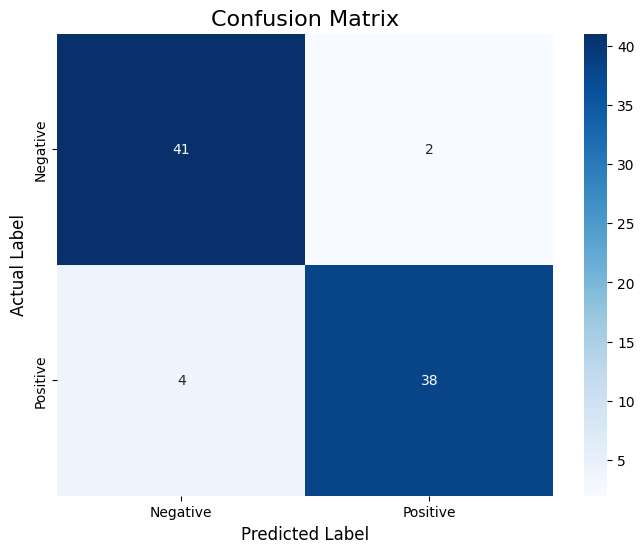

In [33]:
# First, you'll need to install seaborn if you haven't
# Run this line in a cell by itself, then restart the kernel
# !pip install seaborn matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Get the data from your previous cell ---
# We're just re-using the variables 'y_true', 'y_pred', and 'label_names'
# that you already created.
cm = confusion_matrix(y_true, y_pred)
label_names = [LABEL_REVERSE_MAP[i] for i in range(len(LABEL_REVERSE_MAP))]


# --- 2. Create the plot ---
plt.figure(figsize=(8, 6)) # Set the figure size

# This is the main function to create the heatmap
sns.heatmap(cm, 
            annot=True,     # Write the numbers (41, 2, 4, 38) in the squares
            fmt='d',        # Format the numbers as integers
            cmap='Blues',   # Use a blue color scheme
            xticklabels=label_names, # Label the X-axis
            yticklabels=label_names  # Label the Y-axis
           )

# --- 3. Add labels ---
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()


Model AUC Score: 0.9756


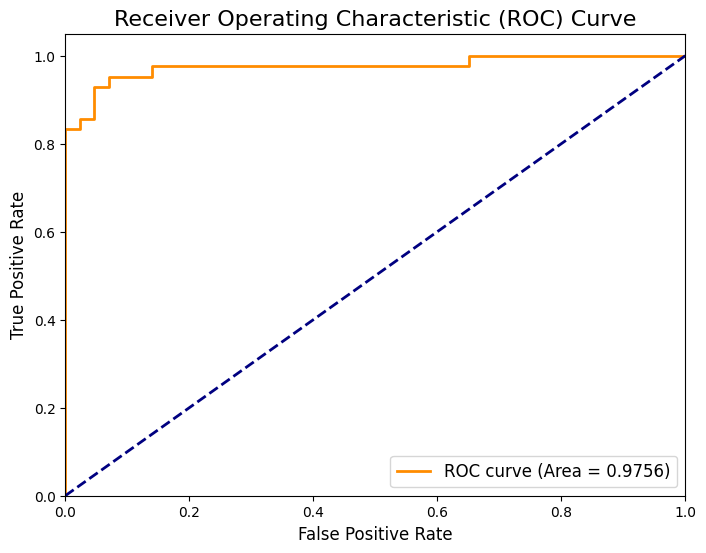

In [34]:
from sklearn.metrics import roc_curve, auc
import torch.nn.functional as F
import matplotlib.pyplot as plt

# --- 1. Get Scores Instead of Predictions ---

# We need the "true" labels
y_true = []
# We need the model's *probability score* for the "Positive" class
y_scores = []

# Put the model in evaluation mode
model.eval()

with torch.no_grad():
    for sentence, label in test_data:
        # Get the raw scores (logits) from the model
        input_indices = sentence_to_tensor(sentence, vocab)
        scores = model(input_indices)
        
        # Convert logits to probabilities (e.g., [0.1, 0.9])
        probabilities = F.softmax(scores, dim=0)
        
        # Store the true label
        y_true.append(label)
        # Store the probability of the POSITIVE class (which is at index 1)
        y_scores.append(probabilities[1].item())

# --- 2. Calculate ROC Curve and AUC Score ---

# This function does all the hard work for us
# It returns the False Positive Rate, True Positive Rate, and the thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# This calculates the Area Under the Curve
roc_auc = auc(fpr, tpr)

print(f"\nModel AUC Score: {roc_auc:.4f}")

# --- 3. Plot the ROC Curve ---

plt.figure(figsize=(8, 6))
# Plot the "bowed" curve
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (Area = {roc_auc:.4f})')
# Plot the "guessing" line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Add labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [35]:
# --- 1. Create the Prediction Function ---

# We need this map again to convert index (0 or 1) to a word
if 'LABEL_REVERSE_MAP' not in locals():
    LABEL_REVERSE_MAP = {v: k for k, v in LABEL_MAP.items()}

def predict_sentiment(sentence, model, vocab_map):
    """
    Predicts the sentiment of a single sentence.
    """
    # 1. Put the model in evaluation mode
    model.eval()

    # 2. Add the [CLS] token, just like the training data
    if not sentence.lower().startswith("[cls]"):
        sentence_with_cls = "[CLS] " + sentence
    else:
        sentence_with_cls = sentence

    # 3. Turn the sentence into a tensor
    # Note: .get(word, 0) maps unknown words to the <PAD> token
    input_indices = sentence_to_tensor(sentence_with_cls, vocab_map)

    # 4. Get the model's prediction
    with torch.no_grad():
        scores = model(input_indices)
        
        # 5. Get the class with the highest score
        predicted_index = torch.argmax(scores).item()

    # 6. Convert the index back to a string label
    return LABEL_REVERSE_MAP[predicted_index]

print("Prediction function is ready.\n")


# --- 2. Test the function with your own sentences! ---

test_sentence_1 = "This was a truly wonderful and inspiring film"
prediction_1 = predict_sentiment(test_sentence_1, model, vocab)
print(f"Sentence: '{test_sentence_1}'")
print(f"Prediction: {prediction_1}\n")


test_sentence_2 = "The plot was predictable and the acting was stiff"
prediction_2 = predict_sentiment(test_sentence_2, model, vocab)
print(f"Sentence: '{test_sentence_2}'")
print(f"Prediction: {prediction_2}\n")

test_sentence_3 = "I didn't really hate it, but it was not great."
prediction_3 = predict_sentiment(test_sentence_3, model, vocab)
print(f"Sentence: '{test_sentence_3}'")
print(f"Prediction: {prediction_3}\n")

test_sentence_4 = "It was a masterpiece of cinema."
prediction_4 = predict_sentiment(test_sentence_4, model, vocab)
print(f"Sentence: '{test_sentence_4}'")
print(f"Prediction: {prediction_4}\n")

Prediction function is ready.

Sentence: 'This was a truly wonderful and inspiring film'
Prediction: Positive

Sentence: 'The plot was predictable and the acting was stiff'
Prediction: Negative

Sentence: 'I didn't really hate it, but it was not great.'
Prediction: Negative

Sentence: 'It was a masterpiece of cinema.'
Prediction: Positive

